<div class="alert alert-success">
<b>Reviewer's comment V2</b>

The project is accepted now! Keep up the great work on the next sprint! 

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job overall! There are only a couple of tiny issues that need to be fixed before the project is accepted. Let me know if you have questions!

# Sprint 9 Project

# Library Initialization

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, mean_absolute_error, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression 
pd.options.mode.chained_assignment = None
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from scipy import stats as st
from numpy.random import RandomState
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output
import seaborn as sns
import random
import numpy as np

# Functions

In [2]:
def profit(target, predicted, count):
    target = pd.Series(target.values)
    predicted = pd.Series(predicted.values)
    predicted_sorted = predicted.sort_values(ascending=False)
    selected = target[predicted_sorted.index][:count]
    selected_total = selected.sum()
    return ((selected_total * income_per_volume) - budget_total)

<div class="alert alert-warning">
<b>Reviewer's comment</b>

The function for profit calculation is correct (note that it is actually profit, not revenue, because the costs are already deducted)

</div>

In [3]:
def revenue_bootstrapping(target, predicted):
    target = pd.Series(target.values)
    values = []
    predicted = pd.Series(predicted)
    state = np.random.RandomState(random_state)
    for i in range(1000):
        target_subsample = target.sample(n=n_points_all,replace=True,random_state=state)
        predicted_subsample = predicted[target_subsample.index]
        values.append(profit(target_subsample,predicted_subsample,n_best_points))
    values = pd.Series(values)
    return values

<div class="alert alert-success">
<b>Reviewer's comment</b>

The function for bootstrapping is correct

</div>

In [4]:
def cv_test(df,features,target):
    scores = []
    rmses=[]
    
    sample_size = int(len(df) / 5)

    for i in range(0, len(df), sample_size):
        valid_indexes = list(range(i, i + sample_size))
        train_indexes = list(range(0, i)) + list(range(i + sample_size, len(df)))

        features_train = features.iloc[train_indexes]
        features_valid = features.iloc[valid_indexes]

        target_train = target.iloc[train_indexes]
        target_valid = target.iloc[valid_indexes]

        model = LinearRegression().fit(features_train, target_train)
        score = model.score(features_valid, target_valid)
        predictions = model.predict(features_valid)
        rmses.append(mean_squared_error(target_valid,predictions)**0.5)
        scores.append(score)
    return round(sum(scores)/len(scores),3),round(sum(rmses)/len(rmses),3)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Cross-validation looks good!

</div>

In [5]:
def scoring(model, features, target, predictions):
    mse = mean_squared_error(target, predictions)
    rmse = mse**0.5
    score = model.score(features, target)
    avg_volume = sum(predictions)/len(predictions)
    return rmse, score, avg_volume

In [6]:
def lr_train(features_train, target_train, features_valid, target_valid):
    lr = LinearRegression().fit(features_train, target_train)
    predictions = lr.predict(features_valid)
    return lr,predictions

In [7]:
def boxplot(df):
    plt.boxplot(df.groupby('product')[['f0','f1','f2']],vert=False,showfliers=True)
    plt.show()

In [8]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [9]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Upsampling and downsampling are not really related to this project :)

</div>

<div class="alert alert-info">
  <b>Reply</b>
    
  I like to have these extra tools on hand just in case.
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

I see :)

</div>

In [10]:
def get_scores(model, features, target, predictions):
    score = model.score(features, target)
    avg_volume = sum(predictions)/len(predictions)
    r2 = r2_score(target,predictions)
    mse = mean_squared_error(target,predictions)
    mae = mean_absolute_error(target,predictions)
    rmse = mse**0.5
    return score, avg_volume, r2, mse, mae, rmse

In [11]:
def one_report(model, features, target, predictions):
    score = model.score(features, target)
    avg_volume = sum(predictions)/len(predictions)
    r2 = r2_score(target,predictions)
    mse = mean_squared_error(target,predictions)
    mae = mean_absolute_error(target,predictions)
    rmse = mse**0.5
    report = pd.DataFrame({'r2_score':r2,
                           'mean_squared_error':mse,
                           'rmse':rmse,
                           'mean_absolute_error':mae,
                           'model_score':score,
                           'average_volume':avg_volume})
    return report

In [12]:
def all_reports(models, all_features, all_targets, all_predictions):
    report = pd.DataFrame(columns=['r2_score',
                                   'mean_squared_error',
                                   'rmse',
                                   'mean_absolute_error',
                                   'score',
                                   'average_volume',
                                   'prediction_mean'])
    for index in range(len(models)):
        score = models[index].score(all_features[index], all_targets[index])
        avg_volume = sum(all_predictions[index])/len(all_predictions[index])
        r2 = r2_score(all_targets[index],all_predictions[index])
        mse = mean_squared_error(all_targets[index],all_predictions[index])
        mae = mean_absolute_error(all_targets[index],all_predictions[index])
        rmse = mse**0.5
        pred_mean = all_predictions[index].mean()
        report.loc[index] = [round(r2,3), 
                             round(mse,3), 
                             round(rmse,3), 
                             round(mae,3), 
                             round(score,3), 
                             round(avg_volume,3),
                             round(pred_mean,3)]
    #report.style.set_properties(**{'text-align': 'center'})
    return report

# 1 Loading Data

In [13]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [14]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [17]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [18]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [19]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [20]:
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [21]:
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [22]:
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [23]:
display(df_0.groupby('id').count().sort_values(by='f0',ascending=False).head(11))

,f0,f1,f2,product
id,,,,
Tdehs,2,2,2,2
bxg6G,2,2,2,2
QcMuo,2,2,2,2
HZww2,2,2,2,2
TtcGQ,2,2,2,2
AGS9W,2,2,2,2
fiKDv,2,2,2,2
bsk9y,2,2,2,2
A5aEY,2,2,2,2


In [24]:
display(df_0.duplicated().sum())
display(df_1.duplicated().sum())
display(df_2.duplicated().sum())

0

0

0

There are 10 ID's that are used twice in this DataFrame. I am not certain whether I should drop one of them, or keep both. For now I will keep both since there are no duplicate rows.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected. 
    
> I am not certain whether I should drop one of them, or keep both.
    
As there are are only a few rows with duplicate ids, there's no harm in dropping them

</div>

## Splitting Data

In [25]:
random_state = 12345

In [26]:
display(random_state)

12345

In [27]:
features_0 = df_0.drop(['id','product'],axis=1)
features_1 = df_1.drop(['id','product'],axis=1)
features_2 = df_2.drop(['id','product'],axis=1)

In [28]:
target_0 = df_0['product'].astype('float')
target_1 = df_1['product'].astype('float')
target_2 = df_2['product'].astype('float')

<div class="alert alert-success">
<b>Reviewer's comment</b>

Features and targets make sense

</div>

# 2.1 Split Data

In [29]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=random_state)

In [30]:
display(target_valid_0.shape)

(25000,)

In [31]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=random_state)

In [32]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=random_state)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data for each region was split into train and validation sets

</div>

# 2.2, 2.3 Train Models

In [33]:
lr_0,predictions_0 = lr_train(
    features_train=features_train_0, 
    target_train=target_train_0, 
    features_valid=features_valid_0, 
    target_valid=target_valid_0)

In [34]:
lr_1,predictions_1 = lr_train(
    features_train=features_train_1, 
    target_train=target_train_1, 
    features_valid=features_valid_1, 
    target_valid=target_valid_1)

In [35]:
lr_2,predictions_2 = lr_train(
    features_train=features_train_2, 
    target_train=target_train_2, 
    features_valid=features_valid_2, 
    target_valid=target_valid_2)

# 2.4 Volume/RMSE

In [36]:
score_0, avg_volume_0, r2_0, mse_0, mae_0, rmse_0 = get_scores(lr_0,features_valid_0,target_valid_0,predictions_0)
score_1, avg_volume_1, r2_1, mse_1, mae_1, rmse_1 = get_scores(lr_1,features_valid_1,target_valid_1,predictions_1)
score_2, avg_volume_2, r2_2, mse_2, mae_2, rmse_2 = get_scores(lr_2,features_valid_2,target_valid_2,predictions_2)

In [37]:
avg_score_0,rmse_0 = cv_test(df_0,features_0,target_0)

In [38]:
avg_score_1,rmse_1 = cv_test(df_1,features_1,target_1)

In [39]:
avg_score_2,rmse_2 = cv_test(df_2,features_2,target_2)

In [40]:
cv_df = pd.DataFrame({'score':[avg_score_0,avg_score_1,avg_score_2],
                      'rmse ':[rmse_0,rmse_1,rmse_2]})

# 2.5 Analysis

In [46]:
display("Initial Models' Results:")
display(all_reports([lr_0,lr_1,lr_2],
                    [features_valid_0,features_valid_1,features_valid_2],
                    [target_valid_0,target_valid_1,target_valid_2],
                    [predictions_0,predictions_1,predictions_2]))

"Initial Models' Results:"

,r2_score,mean_squared_error,rmse,mean_absolute_error,score,average_volume,prediction_mean
0,0.280,1412.213,37.579,30.920,0.280,92.593,92.593
1,1.000,0.798,0.893,0.719,1.000,68.729,68.729
2,0.205,1602.378,40.030,32.793,0.205,94.965,94.965


In [42]:
display('Cross Validation Results:')
display(cv_df)

'Cross Validation Results:'

,score,rmse
0,0.275,37.694
1,1.000,0.890
2,0.199,40.057


After conducting both an initial test, and a cross validation test, both gave similar results. Also, datasets 0 and 2 conducted similar results to each other. Both RMSE's around 40, and both scores being quite low around 0.2-0.3. However, dataset 1 was different. It had very high accuracy, very low error, and had a perfect score. The only issue with it is that its average volume is so low which makes it a tougher site to find a profitable reserve.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

The models were trained and evaluated correctly. What are your conclusions though?

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Very good!

</div>

# 3.1

In [43]:
n_points_all = 500
n_best_points = 200
budget_total = 100000000
income_per_volume = 4500
thres_risk_max = 2.5/100
budget_per_one = budget_total/n_best_points
unit_of_volume = 1000 

# 3.2

In [44]:
display('Volume of reserves sufficient for developing a new well without losses:') 
display(round(budget_total/n_best_points/income_per_volume,2))

'Volume of reserves sufficient for developing a new well without losses:'

111.11

<div class="alert alert-success">
<b>Reviewer's comment</b>

Calculation is correct

</div>

# 3.3

The average predicted volumes are 92.593, 68.729, and 94.965. These are less than 111.11, the volume of reserves sufficient for developing a new well without losses. Therefore, we need to be careful about which reserve we dig a well into. Many of the reserves would make net negative profit.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Huh, the conclusion doesn't really make sense: if the average predicted volume is below the sufficient level, then if we selected the wells to develop randomly, we'd make a loss.
    
Another point is that I couldn't find where you calculated average predicted volume.

</div>

<div class="alert alert-info">
  <b>Reply</b>
    
I read this backwards. I read it as digging wells deeper than 111.11 was outside the budget and would lose profit. Hopefully this new conclusion is better.

The numbers in my conclusion were calculated under 2.5 in the dataframe.
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Yep, now it makes sense!
    
> The numbers in my conclusion were calculated under 2.5 in the dataframe.
    
Alright!

</div>

# 4.3

In [47]:
display('Revenue for region 0:')
display(f'${(round(profit(target=pd.Series(target_valid_0), predicted=pd.Series(predictions_0), count=n_best_points),2)):,}')

'Revenue for region 0:'

'$33,208,260.43'

In [48]:
display('Revenue for region 1:')
display(f'${(round(profit(target=pd.Series(target_valid_1), predicted=pd.Series(predictions_1), count=n_best_points),2)):,}')

'Revenue for region 1:'

'$24,150,866.97'

In [49]:
display('Revenue for region 2:')
display(f'${(round(profit(target=pd.Series(target_valid_2), predicted=pd.Series(predictions_2), count=n_best_points),2)):,}')

'Revenue for region 2:'

'$27,103,499.64'

# 5.1

In [50]:
revenue_0 = revenue_bootstrapping(target_valid_0, predictions_0)
revenue_1 = revenue_bootstrapping(target_valid_1, predictions_1)
revenue_2 = revenue_bootstrapping(target_valid_2, predictions_2)

In [51]:
display(len(revenue_0[revenue_0<0])/len(revenue_0))

0.069

In [52]:
display(len(revenue_1[revenue_1<0])/len(revenue_1))

0.015

In [53]:
display(len(revenue_2[revenue_2<0])/len(revenue_2))

0.076

<AxesSubplot:ylabel='Density'>

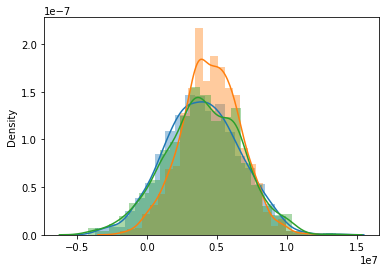

In [54]:
sns.distplot(revenue_0)
sns.distplot(revenue_1)
sns.distplot(revenue_2)

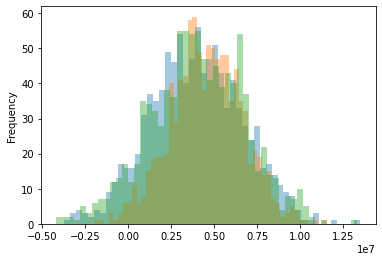

<Figure size 720x720 with 0 Axes>

In [55]:
revenue_0.plot(kind='hist',
              alpha=0.4,
               bins=50)
revenue_1.plot(kind='hist',
              alpha=0.4,
               bins=50)
revenue_2.plot(kind='hist',
              alpha=0.4,
               bins=50)
plt.figure(figsize = (10, 10))
plt.show()

Based on these plots and the above calculations, all three regions are profitable. Regions 1 and 3 appear to have about a 6% chance of losing, and region 2 only has about a 1% chance of losing. Any of these regions may be good fits for developing oil wells. Let's confirm the best option below.

# 5.2

In [56]:
confidence_interval_0 = st.t.interval(alpha=0.95, df=len(revenue_0)-1, loc=revenue_0.mean(), scale=revenue_0.sem())
loss_risk_0 = len(revenue_0[revenue_0 < 0]) / len(revenue_0)
loss_risk_percent_0 = loss_risk_0*100

In [57]:
confidence_interval_1 = st.t.interval(alpha=0.95, df=len(revenue_1)-1, loc=revenue_1.mean(), scale=revenue_1.sem())
loss_risk_1 = len(revenue_1[revenue_1 < 0]) / len(revenue_1)
loss_risk_percent_1 = loss_risk_1*100

In [58]:
confidence_interval_2 = st.t.interval(alpha=0.95, df=len(revenue_2)-1, loc=revenue_2.mean(), scale=revenue_2.sem())
loss_risk_2 = len(revenue_2[revenue_2 < 0]) / len(revenue_2)
loss_risk_percent_2 = loss_risk_2*100

In [59]:
display('The confidence interval of the first region is ($'+str(round(confidence_interval_0[0],2))+', $'+str(round(confidence_interval_0[1],2))+').')
display('The average profit of the first region is $'+str(round(revenue_0.mean(),2)))
display('The risk of losing money in the first region is ' + str(loss_risk_percent_0) + '%')

'The confidence interval of the first region is ($3796203.15, $4127096.54).'

'The average profit of the first region is $3961649.85'

'The risk of losing money in the first region is 6.9%'

In [60]:
display('The confidence interval of the second region is ($'+str(round(confidence_interval_1[0],2))+', $'+str(round(confidence_interval_1[1],2))+').')
display('The average profit of the second region is $'+str(round(revenue_1.mean(),2)))
display('The risk of losing money in the second region is ' + str(loss_risk_percent_1) + '%')

'The confidence interval of the second region is ($4431472.49, $4689429.63).'

'The average profit of the second region is $4560451.06'

'The risk of losing money in the second region is 1.5%'

In [61]:
display('The confidence interval of the third region is ($'+str(round(confidence_interval_2[0],2))+', $'+str(round(confidence_interval_2[1],2))+').')
display('The average profit of the third region is $'+str(round(revenue_2.mean(),2)))
display('The risk of losing money in the third region is ' + str(loss_risk_percent_2) + '%')

'The confidence interval of the third region is ($3874457.97, $4213619.36).'

'The average profit of the third region is $4044038.67'

'The risk of losing money in the third region is 7.6%'

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you successfully estimated the profit distribution for each region using bootstrapping and correctly calculated confidence interval, average profit and risk of losses

</div>

# 5.3

Region two has the highest confidence interval, the lowest risk of losing money at just 1%, and by far the highest quality model score with lowest RMSE. I suggest going to region two for the development of oil wells.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Region choice is correct and justified

</div>